In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv("linkedin-reviews.csv")
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


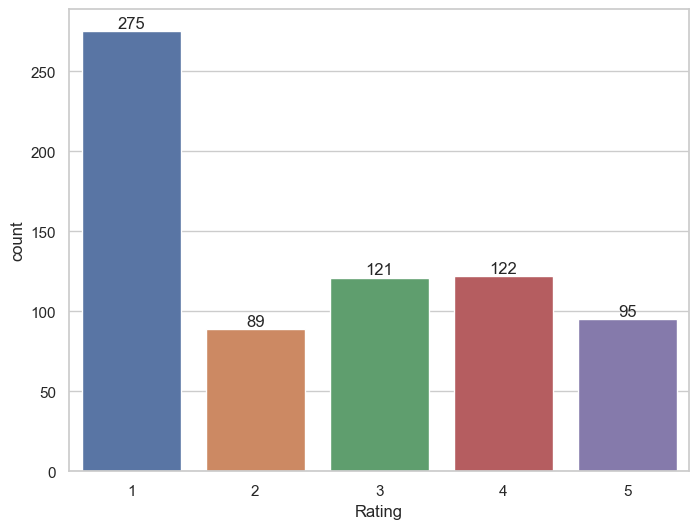

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
ax =sns.countplot(df, x="Rating")
ax.bar_label(ax.containers[0])
plt.show()


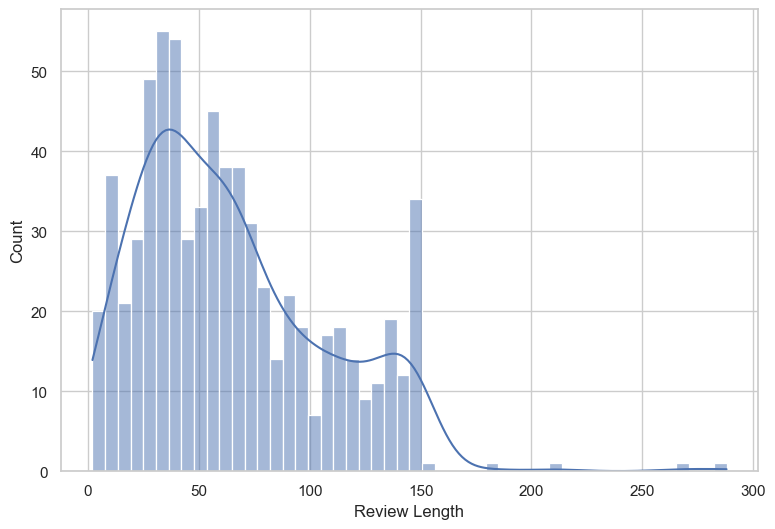

In [17]:
# Calculationg length of each review

df['Review Length'] = df["Review"].apply(len)

# Ploting the distribution on lenth of review

plt.figure(figsize=(9,6))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.show()

In [18]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment

    if sentiment.polarity >0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

df.head()

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


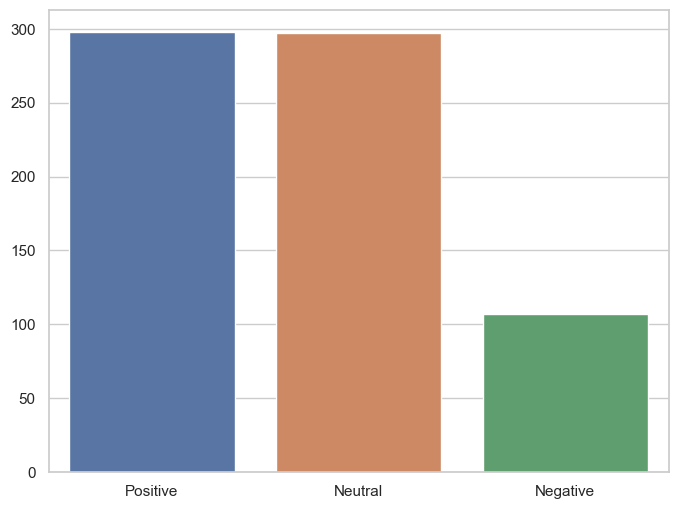

In [23]:
sentiment_distribution = df['Sentiment'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_distribution.index, y= sentiment_distribution.values)

plt.show()

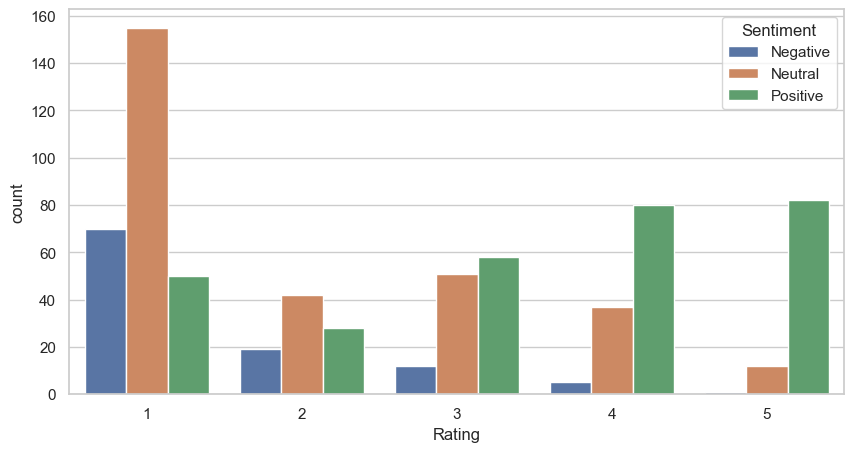

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df, x='Rating', hue ='Sentiment')
plt.show()

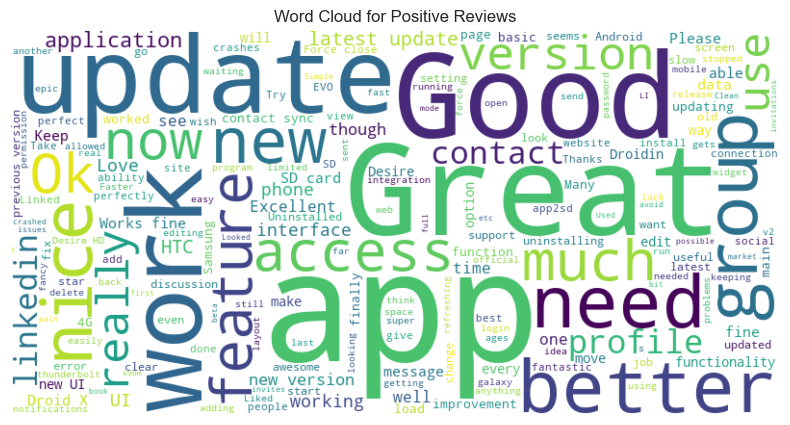

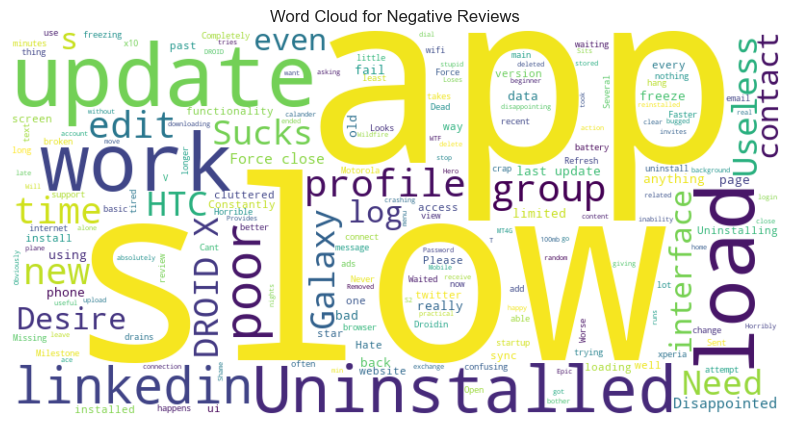

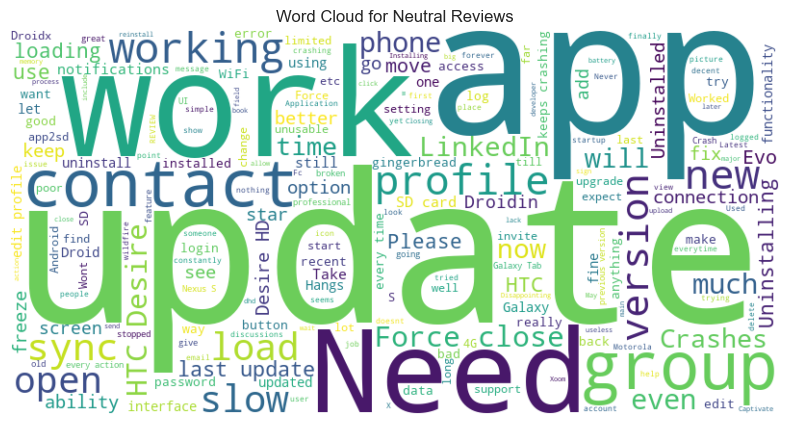

In [36]:
# Word Cloud

from wordcloud import WordCloud

def generate_word_cloud(sentiment):
    text = " ".join(review for review in df[df['Sentiment']==sentiment]['Review'])
    wordcloud = WordCloud(width=800,height =400,background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

for sentiment in ['Positive','Negative', 'Neutral']:
    generate_word_cloud(sentiment)